## Questão 1
**R** - De inicio, fiz a discretização de um sinal senoidal periódico com diferentes quantidades de amostras por ciclo: 3, 5, 10 e 50 amostras. A discretização de um sinal, representada aqui como *𝑥[𝑛]*, envolve a amostragem do sinal contínuo *𝑥(𝑡)* em instantes discretos. A frequência da senoide utilizada é de 60 Hz, o que significa que o período dessa senoide é de aproximadamente 16.67 ms.

Analisando os gráficos, podemos observar o seguinte:

Com apenas 3 ou 5 amostras por ciclo (𝑃 = 3 ou 𝑃 = 5), a discretização não é sufuciente para conseguir analisar exatamente qual sinal está sendo obtido.Com 10 amostras por ciclo (𝑃 = 10), já observamos uma melhora considerável na representação do sinal.Com 50 amostras por ciclo (𝑃 = 50), podemos perceber que a discretização se aproxima muito de um sinal senoidal.Portanto, podemos concluir que, para recuperar adequadamente um sinal a partir de sua versão discretizada, é necessário escolher uma taxa de amostragem apropriada.

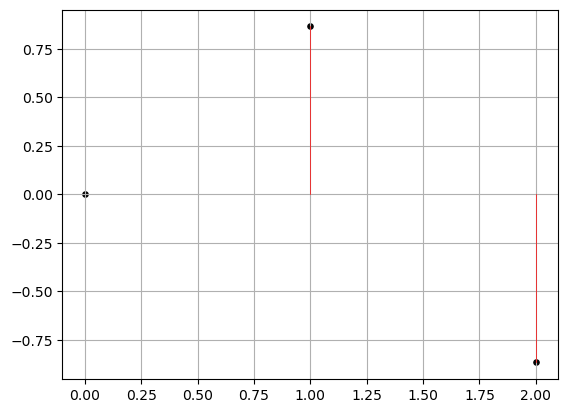

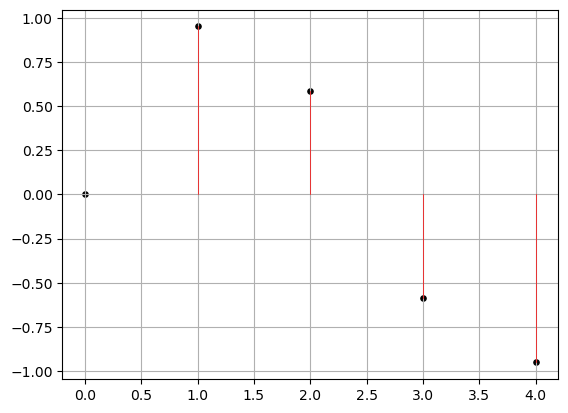

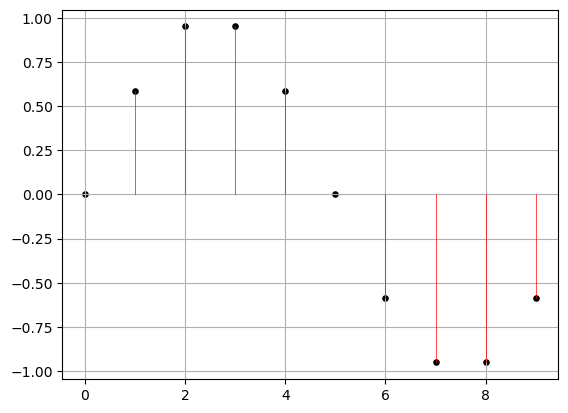

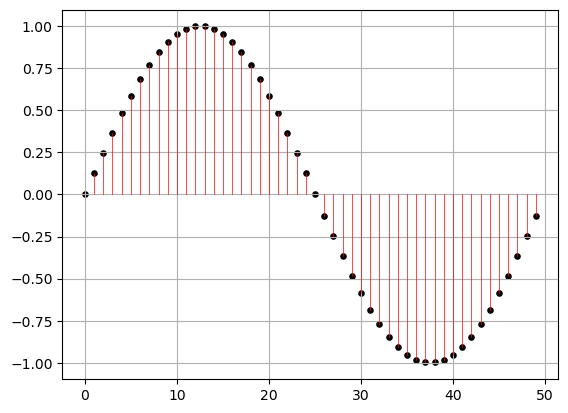

In [1]:
from math import sin,pi
import matplotlib.pyplot as plt

val_amostras = [3,5,10,50]
y=[]
for amostra in val_amostras:
    for n in range(amostra):
        y.append(sin(2*pi*n/amostra))
        
    plt.scatter([range(len(y))],y, s=14,color='#000')
    plt.grid(True)
    for i in range(len(y)):
        plt.plot([i, i], [y[i], 0], color='r', linewidth=0.5)
    plt.show()
    y.clear()

## 2ª Questão

**R** - A forma expandida da equação fica:
$$
\ C = x + i\cdot y
$$
$$
\ a = x_a + i\cdot y_a
$$
$$
\ C\cdot \exp(a \cdot n) = \exp(x_a \cdot n) \cdot [x \cdot \cos(y_a \cdot n) + x \cdot i \cdot \sin(y_a \cdot n) + y \cdot i \cdot \cos(y_a \cdot n) - y \cdot \sin(y_a \cdot n)]
$$

Aqui, $C$ representa a amplitude do sinal complexo e $a$ é um número complexo que controla a taxa de decaimento (amortecimento) e a frequência angular do sinal.

**a) Parte Real do Sinal Exponencial:**

Neste caso, desejamos observar apenas a parte real do sinal exponencial. Para isso, podemos configurar $y_a$ como zero, o que resulta em um sinal puramente exponencial real.

**b) Sinal Oscilatório:**

Quando queremos um sinal que seja puramente oscilatório, podemos configurar $x_a$ como zero, o que resulta em uma parte real zero de $a$ e apenas um sinal senoidal.

**c) Sinal Amortecido:**

Para obter um sinal amortecido, podemos ajustar os valores de $x_a$ e $y_a$ de forma que ambos sejam diferentes de zero. Isso resultará em um sinal que possui componentes exponenciais e senoidais, indicando um comportamento amortecido.

É importante notar que o número de amostras (definido como num_de_amostras) afeta a observação desses sinais. Quanto maior o número de amostras, mais detalhado será o comportamento do sinal ao longo do tempo. Além disso, a variável C influencia na amplitude tanto da parte real quanto da parte imaginária do sinal.


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


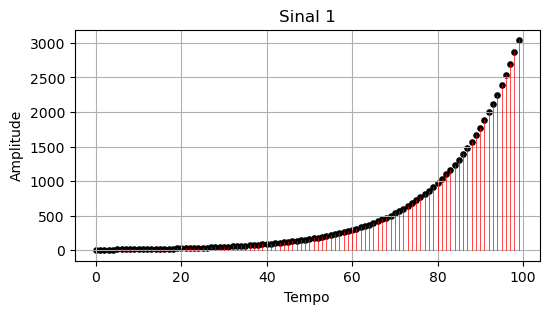

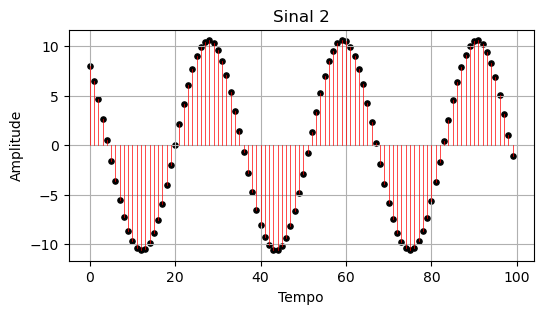

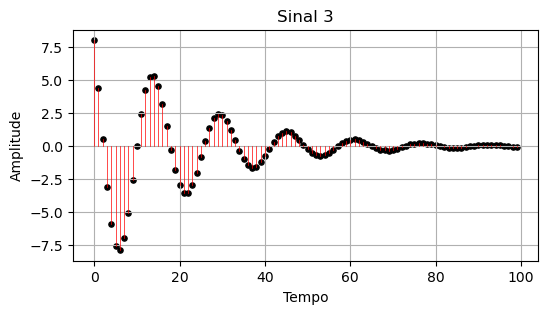

In [11]:
import numpy as np
import matplotlib.pyplot as plt

C = complex(8, 7)
a_exp = complex(0.06, 0)
a_osc = complex(0, 0.2)
a_amortecido = complex(-0.05, 0.4)

v_abc = [(C, a_exp), (C, a_osc), (C, a_amortecido)]

num_de_amostras = 100
tempo = np.arange(num_de_amostras)

for i, (C, a) in enumerate(v_abc):
    sinal = C * np.exp(a * tempo)
    
    plt.figure(figsize=(6,3))
    
    plt.xlabel('Tempo')
    plt.ylabel('Amplitude')
    plt.title(f'Sinal {i + 1}')

    plt.scatter(tempo,sinal, s=14,color='#000')
    plt.grid(True)
    for i in range(len(sinal)):
        plt.plot([i, i], [sinal[i], 0], color='r', linewidth=0.5,)
    plt.show()
    y.clear()



## Questão 3

**R** - Para demonstrar a propriedade dos sinais discretos de que o valor de 𝜔0 (frequência angular) não implica diretamente em uma alta frequência, escolhi valores específicos de 𝜔 = [0.2π, π, 2π] radianos por amostra. Vamos considerar o sinal exponencial complexo periódico $x[n] = \exp(j \cdot w_o \cdot n)$, onde 𝑛 representa o índice da amostra. Ao observar os gráficos gerados para diferentes valores de $w$, podemos notar que o aumento de $w$ não resulta necessariamente em uma oscilação mais rápida do sinal. O que acontece é que um aumento em 𝜔 causa uma "compressão" ou "expansão" do sinal no domínio do tempo discreto. Isso significa que a forma geral da oscilação permanece a mesma, mas o período entre as oscilações pode diminuir ou aumentar com base na frequência angular $w$.

A frequência que faz o sinal oscilar mais rapidamente é aquela com o maior valor de $w$. No caso dos valores escolhidos, a frequência angular de π radianos por amostra resulta na oscilação mais rápida, como observado nos gráficos. Portanto, o aumento de $w$ não aumenta diretamente a oscilação, mas sim ajusta a taxa de oscilação do sinal, encurtando ou alongando o período entre as oscilações no domínio do tempo discreto.

/usr/lib/python3/dist-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


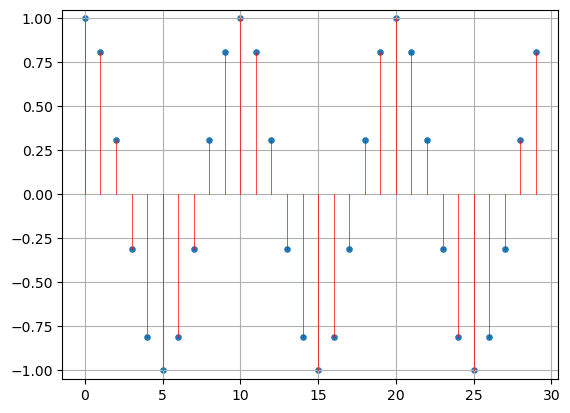

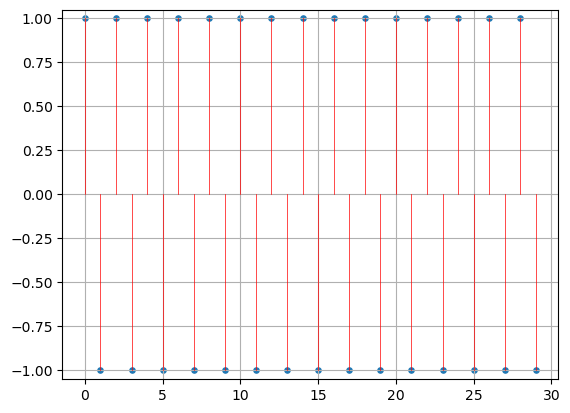

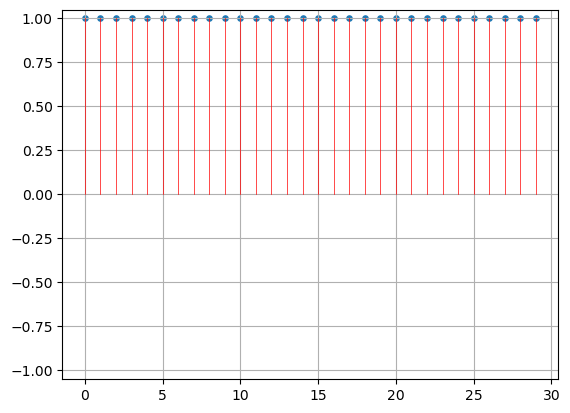

In [3]:
frequencias_w = [.2*pi, pi, 2*pi]
amostras = 30
j = complex(0,1)
for w in frequencias_w:
    for n in range(amostras):
        y.append(np.exp(j*w*n))
    plt.scatter(range(len(np.real(y))),y, s=14)
    plt.ylim(-1.05,1.05)
    for i in range(len(y)):
        plt.plot([i, i], [y[i], 0], color='r', linewidth=0.5)
    plt.grid(True)
    plt.show()
    y.clear()

## 4ª Questão

**R** - Para resolver essa questão, primeiro, criei as funções *impulso_unit_idpnt* e *degrau_unit_idpnt* para gerar os sinais de impulso unitário e degrau unitário, respectivamente, com base no número de amostras fornecido como parâmetro. O impulso unitário é uma sequência que contém um único valor igual a 1 em sua origem, enquanto o degrau unitário é uma sequência que contém valores 1 a partir da origem até o final.

Em seguida, implementei duas funções importantes para a transformação entre esses sinais:

*degrau_from_impulso*: Esta função recebe um sinal de impulso como entrada e realiza a soma acumulativa para criar um sinal de degrau. A cada amostra, ela adiciona o valor do impulso atual ao valor acumulado anterior.*impulso_from_degrau*: Esta função recebe um sinal de degrau como entrada e calcula a primeira diferença entre as amostras para criar um sinal de impulso. Isso é equivalente a aplicar a diferença entre elementos adjacentes.

Por fim, criei a função *onda_from_degrau* para gerar uma onda quadrada a partir de um sinal de degrau. A função extrai uma parte do sinal de degrau, representando uma onda quadrada, considerando 1/4 do início ao 3/4 do comprimento do sinal de degrau.Após definir essas funções, utilizei o matplotlib para plotar os gráficos dos sinais gerados. Os gráficos incluem a função impulso, a função onda a partir do degrau e a função degrau, todos com as devidas marcações e etiquetas.

Essa implementação demonstra como é possível transformar entre essas funções básicas de sinais e também como criar uma onda quadrada a partir do sinal de degrau. Os gráficos gerados facilitam a visualização dessas transformações e ilustram as propriedades dos sinais de impulso e degrau.É importante notar que os gráficos foram gerados para um número de amostras específico (n_amostras = 10), mas essas funções podem ser usadas com qualquer número de amostras desejado.

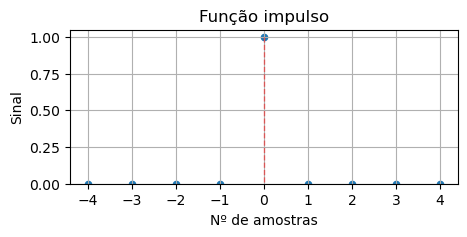

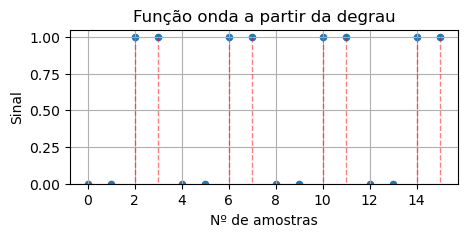

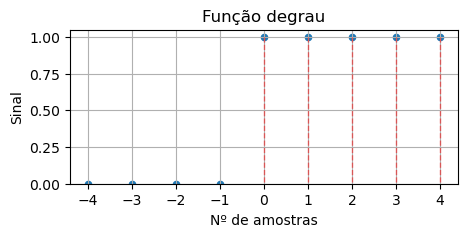

In [4]:

from math import floor
def impulso_unit_idpnt(n_amostras):
    y = [1 if index == 0 else 0 for index in range(-n_amostras//2 + 1,n_amostras//2)]
    return y

def degrau_unit_idpnt(n_amostras):
    y = [1 if index >= 0 else 0 for index in range(-n_amostras//2 + 1,n_amostras//2)]
    return y

def degrau_from_impulso(impulso):
    s = 0
    y = []
    for elem in impulso:
        s += elem
        y.append(s)
    return y

def impulso_from_degrau(degrau):
    #função equivalente a:
    # np.diff(degrau)
    mem=0
    s_diff=0
    diff= 0
    y=[]
    for elem in degrau:
        diff=elem-mem
        s_diff+=diff
        mem=elem
        y.append(diff)

    return y

def onda_from_degrau(degrau):
    deg_size = len(degrau)
    parte = degrau[floor(deg_size/4):floor(3*deg_size/4)]*4
    return parte


n_amostras = 10
x = [index for index in range(-n_amostras//2 + 1,n_amostras//2)]
y_degrau = degrau_unit_idpnt(n_amostras)
y_impulso = impulso_from_degrau(y_degrau)
onda = onda_from_degrau(y_degrau)
x_onda = [index for index in range(len(onda))]

plt.figure(figsize=(5,2))
plt.scatter(x,y_impulso, s=20)
plt.title('Função impulso')
plt.ylabel('Sinal')
plt.xlabel('Nº de amostras')
plt.ylim(0,1.05)
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y_impulso[i], 0], color='r', linewidth=1, linestyle='--', alpha=0.5)
plt.grid(True)
plt.show()

plt.figure(figsize=(5,2))
plt.scatter(range(len(onda)),onda, s=20)
plt.title('Função onda a partir da degrau')
plt.ylabel('Sinal')
plt.xlabel('Nº de amostras')
plt.ylim(0,1.05)
for i in range(len(x_onda)):
    plt.plot([x_onda[i], x_onda[i]], [onda[i], 0], color='r', linewidth=1, linestyle='--', alpha=0.5)
plt.grid(True)
plt.show()

plt.figure(figsize=(5,2))
plt.scatter(x,y_degrau, s=20)
plt.title('Função degrau')
plt.ylabel('Sinal')
plt.xlabel('Nº de amostras')
plt.ylim(0,1.05)
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y_degrau[i], 0], color='r', linewidth=1, linestyle='--', alpha=0.5)
plt.grid(True)
plt.show()

## 5ª Questão

**R** - É importante observar que, embora no plot das imagens o resultado pareça estar de acordo com o esperado, no código em si, os eixos estão invertidos. Essa inversão ocorre durante a conversão da imagem para um vetor bidimensional usando a biblioteca numpy. A função numpy.array(imagem) inverte a manipulação dos eixos, o que pode causar confusão na interpretação. No entanto, é importante ressaltar que as manipulações foram realizadas corretamente para atender aos valores esperados nos itens da questão. Portanto, mesmo que os eixos pareçam invertidos no código, as transformações foram aplicadas conforme especificado nas instruções, resultando nos resultados desejados.

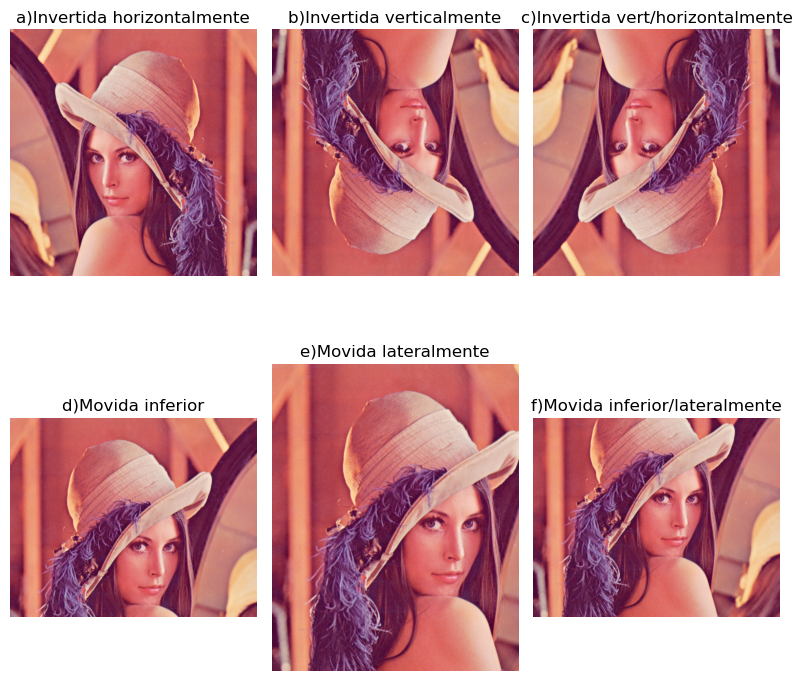

In [38]:
from PIL import Image
import numpy as np

imagem = Image.open('./Lenna.png')
imagem_v = np.array(imagem)

v_size = len(imagem_v)


imgs = [('a)Invertida horizontalmente',imagem_v[::,::-1] ),
        ('b)Invertida verticalmente',imagem_v[::-1,:] ),
        ('c)Invertida vert/horizontalmente',imagem_v[::-1, ::-1] ),
        ('d)Movida inferior',imagem_v[:v_size-100, ::] ),
        ('e)Movida lateralmente',imagem_v[:, :v_size-100] ),
        ('f)Movida inferior/lateralmente',imagem_v[:v_size-100, :v_size-100] ),]

fig, axes = plt.subplots(2,3, figsize=(8, 8))

for i, ax in enumerate(axes.ravel()):
    ax.imshow(np.array(imgs[i][1]))  
    ax.set_title(imgs[i][0])
    ax.axis('off')  

plt.tight_layout()

plt.show()
